<a href="https://colab.research.google.com/github/vtnyx/vk_master/blob/main/ctgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enable GPU in Notebook-Settings on colab

In [ ]:
!pip install ctgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import os
import matplotlib.pyplot as plt
import time

In [ ]:
##in the future with link reference
#from google.colab import files
#data = files.upload()
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
data = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
data = data.drop(columns=["Outcome"])

In [ ]:
from ctgan import CTGAN
from ctgan import load_demo


**log_frequency**: Whether to use log frequency of categorical levels in conditional sampling. It defaults to True. 
This argument affects how the model processes the frequencies of the categorical values that are used to condition the rest of the values. 
In some cases, changing it to False could lead to better performance.

**embedding_dim (int)**: Size of the random sample passed to the Generator. Defaults to 128.

**generator_dim (tuple or list of ints)**: Size of the output samples for each one of the Residuals. A Resiudal Layer will be created for each one of the values provided. Defaults to (256, 256).

**discriminator_dim (tuple or list of ints)**: Size of the output samples for each one of the Discriminator Layers. A Linear Layer will be created for each one of the values provided. Defaults to (256, 256).

**generator_lr (float)**: Learning rate for the generator. Defaults to 2e-4.

**generator_decay (float)**: Generator weight decay for the Adam Optimizer. Defaults to 1e-6.

**discriminator_lr (float)**: Learning rate for the discriminator. Defaults to 2e-4.

**discriminator_decay (float)**: Discriminator weight decay for the Adam Optimizer. Defaults to 1e-6.

**discriminator_steps (int)**: Number of discriminator updates to do for each generator update. 
From the WGAN paper: https://arxiv.org/abs/1701.07875. 
WGAN paper default is 5. Default used is 1 to match original CTGAN implementation.

In [ ]:
_epochs=5000
_batch_size=100
_generator_lr=2e-4
_discriminator_lr=2e-4
_discriminator_steps=1

In [ ]:
# Names of the columns that are discrete
discrete_columns = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'Age'
]

cont_columns = [
    'BMI',
    'DiabetesPedigreeFunction'
]


In [ ]:


ctgan = CTGAN(cuda=True, epochs=_epochs, batch_size=_batch_size)
ctgan.fit(data, discrete_columns)

# Create synthetic data
synthetic_data = ctgan.sample(2000)

In [ ]:
synthetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,95,68,30,485,29.3869,0.2014,22
1,0,158,96,30,0,28.8124,0.1164,26
2,1,88,68,28,77,37.4856,0.3937,33
3,3,124,40,50,64,29.4825,0.3078,58
4,2,189,44,41,88,50.5869,0.6502,25


In [ ]:
from table_evaluator import load_data, TableEvaluator

In [ ]:
table_evaluator = TableEvaluator(data, synthetic_data)

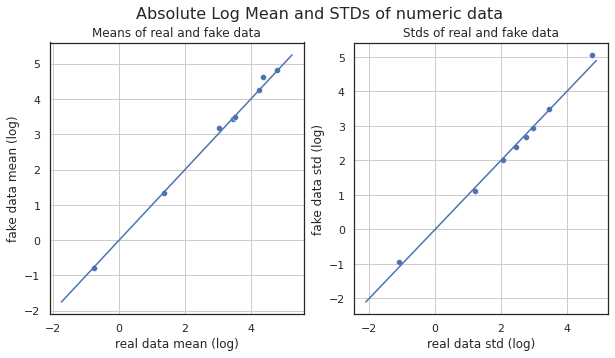

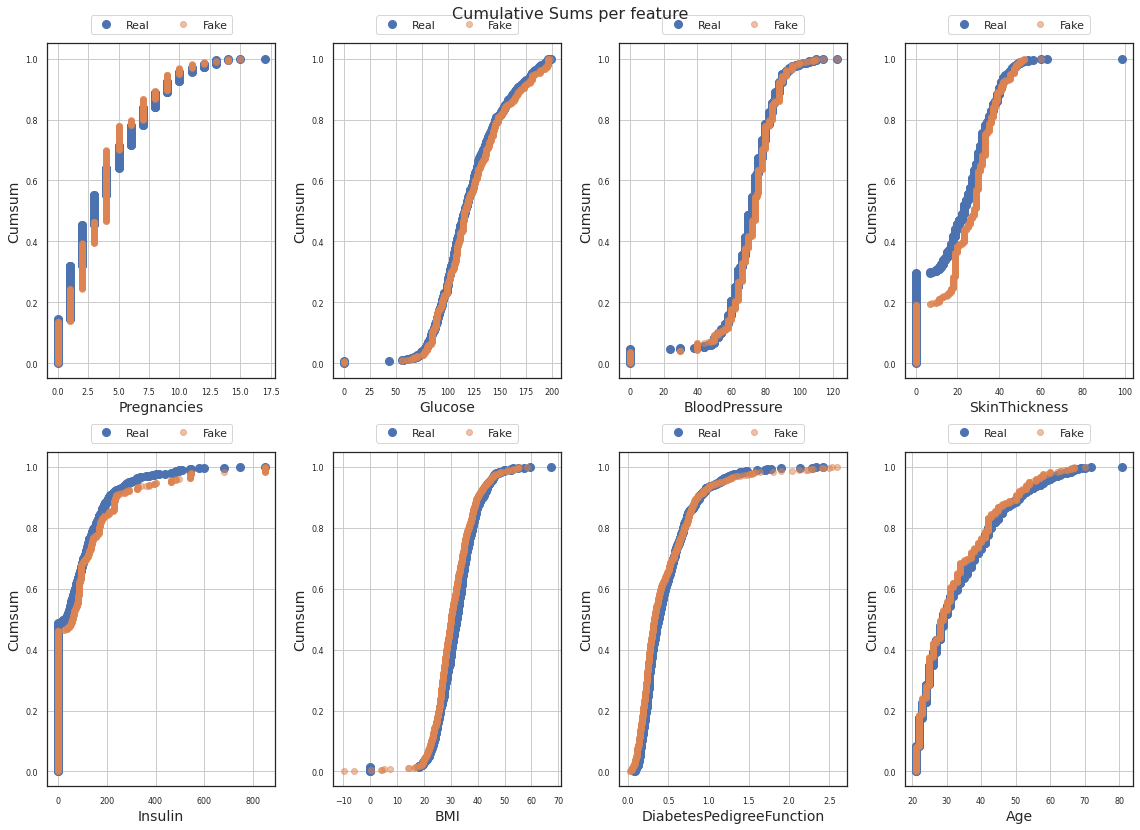

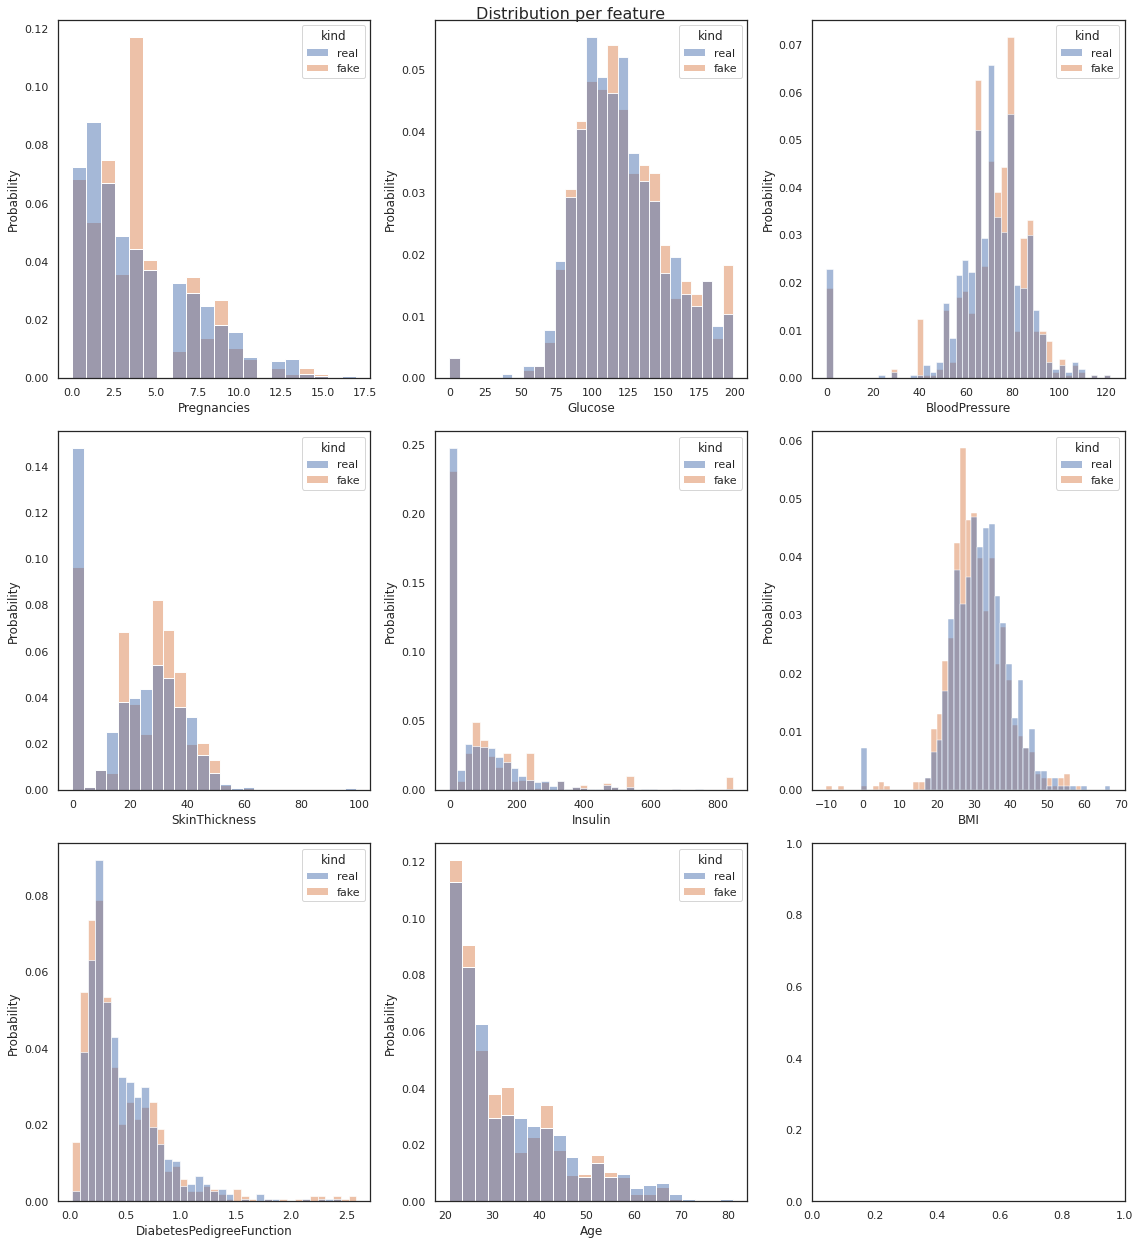

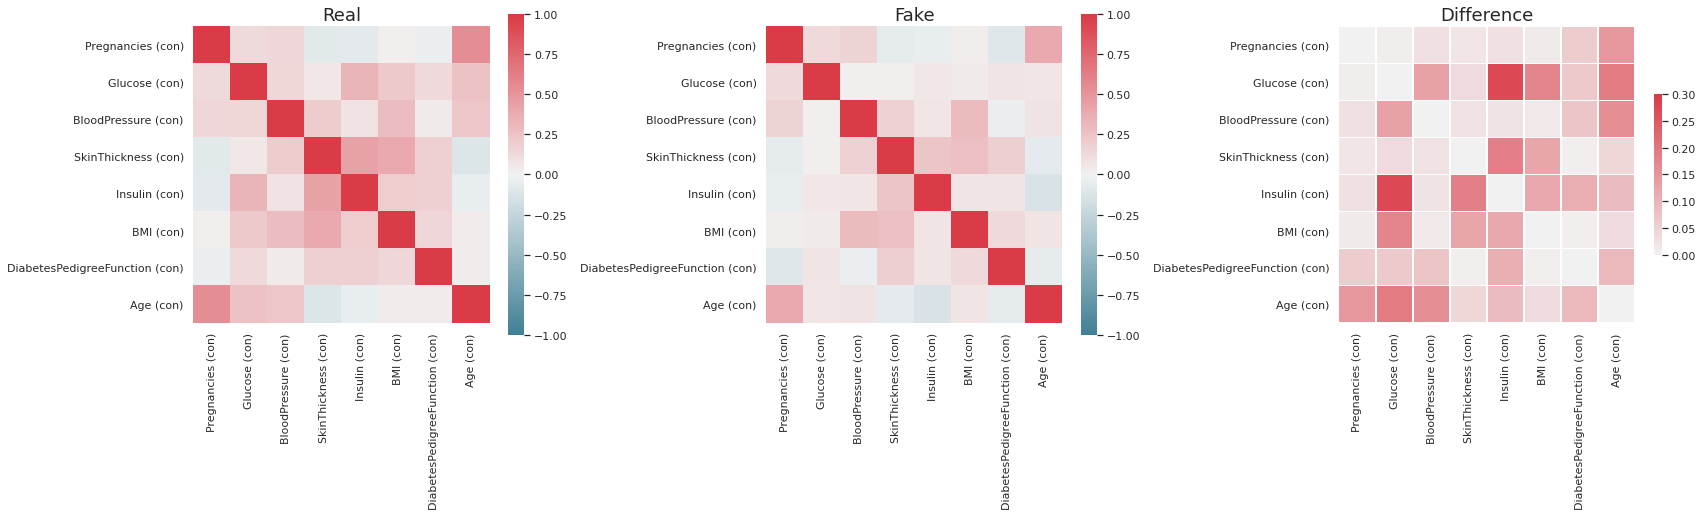

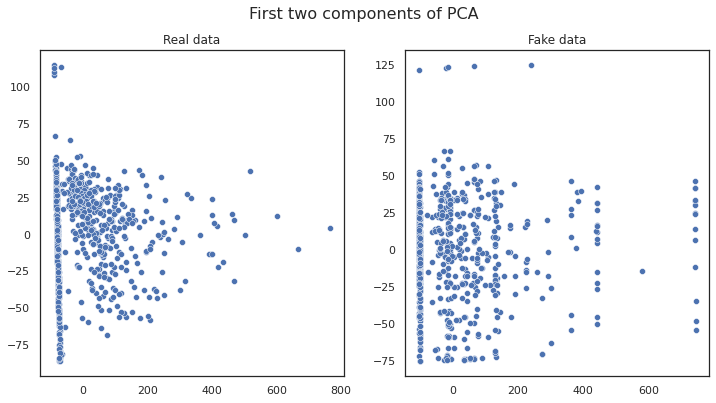

In [ ]:
table_evaluator.visual_evaluation()

In [ ]:
#table_evaluator.evaluate(target_col='Pregnancies')

In [ ]:
fileName = (f'e{_epochs}bs{_batch_size}glr{_generator_lr}dlr{_discriminator_lr}ds{_discriminator_steps}')

In [ ]:
synthetic_data.to_csv(f'{fileName}_out.csv')

In [ ]:
ctgan.save(f'{fileName}_model.pkl')

In [ ]:
for col in list(data.columns.values):
  print(col)
  if(col in cont_columns):
     continue ### to do: if in cont column, ignore for now
  table_evaluator.evaluate(target_col=col)
  print("")

Pregnancies

Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.1234   0.1234              0.0584
DecisionTreeClassifier_real   0.1818   0.1234              0.0807
LogisticRegression_fake       0.1948   0.1429              0.1039
LogisticRegression_real       0.2208   0.1104              0.0807
MLPClassifier_fake            0.1234   0.1558              0.1450
MLPClassifier_real            0.1948   0.1364              0.1241
RandomForestClassifier_fake   0.1818   0.2273              0.1159
RandomForestClassifier_real   0.1688   0.1623              0.0961

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.1565
nearest neighbor std                     0.4876

Miscellaneous results:
                                  Resul

/usr/local/lib/python3.7/dist-packages/table_evaluator/metrics.py:42: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true))



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0455   0.0325              0.0065
DecisionTreeClassifier_real   0.0130   0.0065              0.0165
LogisticRegression_fake       0.0195   0.0325              0.0033
LogisticRegression_real       0.0065   0.0065              0.0098
MLPClassifier_fake            0.0130   0.0325              0.0033
MLPClassifier_real            0.0130   0.0065              0.0065
RandomForestClassifier_fake   0.0390   0.0455              0.0065
RandomForestClassifier_real   0.0000   0.0130              0.0098

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.1565
nearest neighbor std                     0.4876

Miscellaneous results:
                                  Result
Column Cor


# TO DO:
### Risk / Evaluation metrics for synthetic data


**Statsitic similarity of data sets:**
- I plan to implement KL Divergence for categorical and continous data types
- I plan to implement Chi Square (CS) for categorical data types

> Eingerückter Textblock



**ML performance:**
- I plan to implement different types of GAN's to see the outcomes
- I plan to implement changes to current versions of GAN's to see outcomes

**Privacy cost:**
- (simple) Check for Identity rows, such as:
  - Hamming distance for categorical data types
  - euclidian distance for continous data types
- Attribute similarities (columns)
  - Linear regression for categorical data types
  - K-Nearest Neighbor